# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [2]:
import pandas as pd
import numpy as np

In [3]:
from string import ascii_lowercase as letters
print(letters)
print(letters[1:10:2])

abcdefghijklmnopqrstuvwxyz
bdfhj


In [4]:
# Creating a Series from a list
data = [1, 2, 3, 4, 5]
s = pd.Series(data, index=['a1', 'b2', 'c3', 'd4', 'e5'])
print(s['b2'])

2


In [5]:
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
    
print ("xs indexes:",xs.values, xs.index)

xs indexes: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object')


## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [6]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print ("xs:", xs,'\n')
print ("xs indexes:",xs.index,'\n')
# Values of the Series are actually a numpy array
print ("xs values:", xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')
print (type(xs[['d', 'f', 'h']]), '\n')

xs: a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

xs indexes: Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

xs values: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 

<class 'pandas.core.series.Series'> 



In [7]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [8]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)

b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without considering whether the Series involved have the same labels.

In [9]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
print(s)
s = s[1:] + s[:-1]
print(s)

a    0.426036
b   -0.964370
c    0.953377
d   -0.646484
e   -0.141835
dtype: float64
a         NaN
b   -1.928739
c    1.906754
d   -1.292967
e         NaN
dtype: float64


### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas has a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [10]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
print(date)

date = dt.datetime(2023,11,22,10,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 22 2023'
# or alternatively
date = '22/11/2023 10:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)

2024-01-21
2023-11-22 10:45:10.000015
22/11/2023 10:45:00
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-23 10:45:00',
               '2023-11-24 10:45:00', '2023-11-25 10:45:00',
               '2023-11-26 10:45:00', '2023-11-27 10:45:00',
               '2023-11-28 10:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 10:45:01',
               '2023-11-22 10:45:02', '2023-11-22 10:45:03',
               '2023-11-22 10:45:04', '2023-11-22 10:45:05',
               '2023-11-22 10:45:06', '2023-11-22 10:45:07',
               '2023-11-22 10:45:08', '2023-11-22 10:45:09',
               ...
               '2023-11-22 11:44:50', '2023-11-22 11:44:51',
               '2023-11-22 11:44:52', '2023-11-22 11:44:53',
               '2023-11-22 11:44:54', '2023-11-22 11:44:55',
               '2023-11-22 11:44:56', '2023-11-22 11:44:57',
               '2023-11-22 11:44:58', '2023-11-22 11:44:59'],
              dtype='datetime64[ns]', leng

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset.

Timestamp is the pandas equivalent of python’s Datetime and is interchangeable with it in most cases. 

In [11]:
tstamp = pd.Timestamp(dt.datetime(2020, 11, 9))

# internally it counts the nanoseconds from January 1st 19
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
ts = pd.to_datetime('2010/11/12', format='%Y/%m/%d')
print (type(ts))
print (ts.value)
ts = pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M')
print (ts)
print (ts.value)

1604880000000000000
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
1289520000000000000
2010-11-12 00:00:00
1289520000000000000


A standard series can be created and (range of) elements can be used as indexes

In [12]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2023-11-22':'2023-11-28'], '\n') # Note - includes end time

2023-11-22 10:45:00    10.440833
2023-11-23 10:45:00    11.005919
2023-11-24 10:45:00     9.990657
2023-11-25 10:45:00     8.439830
Freq: D, dtype: float64 

2023-11-22 10:45:00    10.440833
2023-11-23 10:45:00    11.005919
2023-11-24 10:45:00     9.990657
2023-11-25 10:45:00     8.439830
2023-11-26 10:45:00     9.753812
2023-11-27 10:45:00     9.876092
2023-11-28 10:45:00     9.553959
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [13]:
pd.to_datetime([1, 2, 3, 4], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06', '1980-02-07'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [14]:
entries=10
dates=pd.date_range('11/22/2023 10:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df

,A,B,C,D
2023-11-22 10:45:00,0.318439,-0.095339,-1.403057,0.984921
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,-2.029625
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,0.395828
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,2.236371
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,0.850371
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,-1.359291
2023-11-22 16:45:00,0.002953,0.006921,1.136601,-0.202180
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,0.588725
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,-0.868796
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,-0.457561


or by means of a dictionary:


In [15]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
df2

# check what happens if D and E had different lenghts 

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [16]:
df

,A,B,C,D
2023-11-22 10:45:00,0.318439,-0.095339,-1.403057,0.984921
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,-2.029625
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,0.395828
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,2.236371
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,0.850371
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,-1.359291
2023-11-22 16:45:00,0.002953,0.006921,1.136601,-0.202180
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,0.588725
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,-0.868796
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,-0.457561


In [17]:
df.head(2)

,A,B,C,D
2023-11-22 10:45:00,0.318439,-0.095339,-1.403057,0.984921
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,-2.029625


In [18]:
df.tail(4)

,A,B,C,D
2023-11-22 16:45:00,0.002953,0.006921,1.136601,-0.202180
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,0.588725
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,-0.868796
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,-0.457561


In [19]:
df.index

DatetimeIndex(['2023-11-22 10:45:00', '2023-11-22 11:45:00',
               '2023-11-22 12:45:00', '2023-11-22 13:45:00',
               '2023-11-22 14:45:00', '2023-11-22 15:45:00',
               '2023-11-22 16:45:00', '2023-11-22 17:45:00',
               '2023-11-22 18:45:00', '2023-11-22 19:45:00'],
              dtype='datetime64[ns]', freq='H')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [21]:
df.values

array([[ 0.31843879, -0.0953392 , -1.4030573 ,  0.984921  ],
       [ 1.44265575, -1.71329854, -0.15176374, -2.02962531],
       [-2.1158606 , -0.48023536,  0.09216908,  0.39582779],
       [ 0.31269486, -0.19366039,  0.05929968,  2.23637053],
       [-1.82063514, -0.62608231,  1.45068514,  0.85037095],
       [ 0.55030064,  1.55422702, -0.36249093, -1.35929066],
       [ 0.00295299,  0.0069207 ,  1.13660149, -0.20217998],
       [ 0.1731474 , -2.14011627, -2.28869962,  0.58872535],
       [-0.38206977,  0.13358071, -0.60482672, -0.86879609],
       [-0.60605442,  0.21562847, -0.6277202 , -0.4575609 ]])

In [22]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.212443,-0.333838,-0.269980,0.013876
std,1.078414,1.030114,1.095469,1.254680
min,-2.115861,-2.140116,-2.288700,-2.029625
25%,-0.550058,-0.589621,-0.621997,-0.765987
50%,0.088050,-0.144500,-0.257127,0.096824
75%,0.317003,0.101916,0.083952,0.784960
max,1.442656,1.554227,1.450685,2.236371


In [23]:
df.T

,2023-11-22 10:45:00,2023-11-22 11:45:00,2023-11-22 12:45:00,2023-11-22 13:45:00,2023-11-22 14:45:00,2023-11-22 15:45:00,2023-11-22 16:45:00,2023-11-22 17:45:00,2023-11-22 18:45:00,2023-11-22 19:45:00
A,0.318439,1.442656,-2.115861,0.312695,-1.820635,0.550301,0.002953,0.173147,-0.382070,-0.606054
B,-0.095339,-1.713299,-0.480235,-0.193660,-0.626082,1.554227,0.006921,-2.140116,0.133581,0.215628
C,-1.403057,-0.151764,0.092169,0.059300,1.450685,-0.362491,1.136601,-2.288700,-0.604827,-0.627720
D,0.984921,-2.029625,0.395828,2.236371,0.850371,-1.359291,-0.202180,0.588725,-0.868796,-0.457561


In [24]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,-0.457561
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,-0.868796
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,0.588725
2023-11-22 16:45:00,0.002953,0.006921,1.136601,-0.202180
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,-1.359291
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,0.850371
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,2.236371
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,0.395828
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,-2.029625
2023-11-22 10:45:00,0.318439,-0.095339,-1.403057,0.984921


In [25]:
df.sort_values(by="C")

,A,B,C,D
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,0.588725
2023-11-22 10:45:00,0.318439,-0.095339,-1.403057,0.984921
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,-0.457561
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,-0.868796
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,-1.359291
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,-2.029625
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,2.236371
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,0.395828
2023-11-22 16:45:00,0.002953,0.006921,1.136601,-0.202180
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,0.850371


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [26]:
## standard and safe
print (df['A'], '\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2023-11-22 10:45:00    0.318439
2023-11-22 11:45:00    1.442656
2023-11-22 12:45:00   -2.115861
2023-11-22 13:45:00    0.312695
2023-11-22 14:45:00   -1.820635
2023-11-22 15:45:00    0.550301
2023-11-22 16:45:00    0.002953
2023-11-22 17:45:00    0.173147
2023-11-22 18:45:00   -0.382070
2023-11-22 19:45:00   -0.606054
Freq: H, Name: A, dtype: float64 

2023-11-22 10:45:00    0.318439
2023-11-22 11:45:00    1.442656
2023-11-22 12:45:00   -2.115861
2023-11-22 13:45:00    0.312695
2023-11-22 14:45:00   -1.820635
2023-11-22 15:45:00    0.550301
2023-11-22 16:45:00    0.002953
2023-11-22 17:45:00    0.173147
2023-11-22 18:45:00   -0.382070
2023-11-22 19:45:00   -0.606054
Freq: H, Name: A, dtype: float64


In [27]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2023-11-22 10:45:00":"2023-11-22 12:45:00"])

                            A         B         C         D
2023-11-22 10:45:00  0.318439 -0.095339 -1.403057  0.984921
2023-11-22 11:45:00  1.442656 -1.713299 -0.151764 -2.029625
2023-11-22 12:45:00 -2.115861 -0.480235  0.092169  0.395828
                            A         B         C         D
2023-11-22 10:45:00  0.318439 -0.095339 -1.403057  0.984921
2023-11-22 11:45:00  1.442656 -1.713299 -0.151764 -2.029625
2023-11-22 12:45:00 -2.115861 -0.480235  0.092169  0.395828


### Selection by label

In [28]:
dates[0]

Timestamp('2023-11-22 10:45:00', freq='H')

In [29]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.318439
B   -0.095339
C   -1.403057
D    0.984921
Name: 2023-11-22 10:45:00, dtype: float64

In [30]:
df.loc['2023-11-22 10:45:00']

A    0.318439
B   -0.095339
C   -1.403057
D    0.984921
Name: 2023-11-22 10:45:00, dtype: float64

In [31]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]
#a=df.loc[:,['A','B']]

,A,B
2023-11-22 10:45:00,0.318439,-0.095339
2023-11-22 11:45:00,1.442656,-1.713299
2023-11-22 12:45:00,-2.115861,-0.480235
2023-11-22 13:45:00,0.312695,-0.193660
2023-11-22 14:45:00,-1.820635,-0.626082
2023-11-22 15:45:00,0.550301,1.554227
2023-11-22 16:45:00,0.002953,0.006921
2023-11-22 17:45:00,0.173147,-2.140116
2023-11-22 18:45:00,-0.382070,0.133581
2023-11-22 19:45:00,-0.606054,0.215628


In [32]:
# showing label slicing, both endpoints are included:
df.loc['2023-11-22 14:45:00':'2023-11-22 16:45:00',['A','B']]

,A,B
2023-11-22 14:45:00,-1.820635,-0.626082
2023-11-22 15:45:00,0.550301,1.554227
2023-11-22 16:45:00,0.002953,0.006921


In [33]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

1.4426557542191458
1.4426557542191458


### Selecting by position

In [34]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    0.312695
B   -0.193660
C    0.059300
D    2.236371
Name: 2023-11-22 13:45:00, dtype: float64 

                            A         B
2023-11-22 13:45:00  0.312695 -0.193660
2023-11-22 14:45:00 -1.820635 -0.626082


In [35]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2023-11-22 11:45:00,1.442656,-0.151764
2023-11-22 12:45:00,-2.115861,0.092169
2023-11-22 14:45:00,-1.820635,1.450685


In [36]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2023-11-22 11:45:00  1.442656 -1.713299 -0.151764 -2.029625
2023-11-22 12:45:00 -2.115861 -0.480235  0.092169  0.395828 

                            B         C
2023-11-22 10:45:00 -0.095339 -1.403057
2023-11-22 11:45:00 -1.713299 -0.151764
2023-11-22 12:45:00 -0.480235  0.092169
2023-11-22 13:45:00 -0.193660  0.059300
2023-11-22 14:45:00 -0.626082  1.450685
2023-11-22 15:45:00  1.554227 -0.362491
2023-11-22 16:45:00  0.006921  1.136601
2023-11-22 17:45:00 -2.140116 -2.288700
2023-11-22 18:45:00  0.133581 -0.604827
2023-11-22 19:45:00  0.215628 -0.627720


In [37]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


-1.7132985372094374

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [38]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,-1.359291
2023-11-22 16:45:00,0.002953,0.006921,1.136601,-0.202180
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,-0.868796
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,-0.457561


In [39]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2023-11-22 10:45:00,0.318439,NaN,NaN,0.984921
2023-11-22 11:45:00,1.442656,NaN,NaN,NaN
2023-11-22 12:45:00,NaN,NaN,0.092169,0.395828
2023-11-22 13:45:00,0.312695,NaN,0.059300,2.236371
2023-11-22 14:45:00,NaN,NaN,1.450685,0.850371
2023-11-22 15:45:00,0.550301,1.554227,NaN,NaN
2023-11-22 16:45:00,0.002953,0.006921,1.136601,NaN
2023-11-22 17:45:00,0.173147,NaN,NaN,0.588725
2023-11-22 18:45:00,NaN,0.133581,NaN,NaN
2023-11-22 19:45:00,NaN,0.215628,NaN,NaN


### Setting

Combination of selection and setting of values

In [40]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)

In [41]:
df

,A,B,C,D,E,E prime
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,0
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,5,0.5,2
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,5,1.0,4
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,5,1.5,6
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,5,2.0,8
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,5,2.5,10
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,5,3.5,14
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,5,4.0,16
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,5,4.5,18


In [42]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,0,1.000000
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,5,0.5,2,0.999962
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,5,1.0,4,0.999848
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,5,2.0,8,0.999391
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,5,2.5,10,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12,0.998630
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,5,3.5,14,0.998135
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,5,4.0,16,0.997564
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,5,4.5,18,0.996917


In [43]:
# another example of global setting
df2=df.copy()

df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,-5,0.0,0,-1.000000
2023-11-22 11:45:00,-1.442656,-1.713299,-0.151764,-5,-0.5,-2,-0.999962
2023-11-22 12:45:00,-2.115861,-0.480235,-0.092169,-5,-1.0,-4,-0.999848
2023-11-22 13:45:00,-0.312695,-0.193660,-0.059300,-5,-1.5,-6,-0.999657
2023-11-22 14:45:00,-1.820635,-0.626082,-1.450685,-5,-2.0,-8,-0.999391
2023-11-22 15:45:00,-0.550301,-1.554227,-0.362491,-5,-2.5,-10,-0.999048
2023-11-22 16:45:00,-0.002953,-0.006921,-1.136601,-5,-3.0,-12,-0.998630
2023-11-22 17:45:00,-0.173147,-2.140116,-2.288700,-5,-3.5,-14,-0.998135
2023-11-22 18:45:00,-0.382070,-0.133581,-0.604827,-5,-4.0,-16,-0.997564
2023-11-22 19:45:00,-0.606054,-0.215628,-0.627720,-5,-4.5,-18,-0.996917


In [44]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,0,1.000000
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,5,0.5,2,0.999962
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,5,1.0,4,0.999848
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,5,2.0,8,0.999391
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,5,2.5,10,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12,0.998630
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,5,3.5,14,0.998135
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,5,4.0,16,0.997564
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,5,4.5,18,0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [45]:
# Dropping by column
df.drop(['E prime'], axis=1)

#which is equivalent to
new_df=df.drop(columns=['E prime'])
new_df

,A,B,C,D,E,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,1.000000
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,5,0.5,0.999962
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,5,1.0,0.999848
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,5,1.5,0.999657
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,5,2.0,0.999391
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,5,2.5,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,0.998630
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,5,3.5,0.998135
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,5,4.0,0.997564
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,5,4.5,0.996917


In [46]:
# Dropping by raws
# safe and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,0,1.000000
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,5,2.5,10,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12,0.998630
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,5,3.5,14,0.998135
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,5,4.0,16,0.997564
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,5,4.5,18,0.996917


In [47]:
df.index[[1,2,3,4]]

DatetimeIndex(['2023-11-22 11:45:00', '2023-11-22 12:45:00',
               '2023-11-22 13:45:00', '2023-11-22 14:45:00'],
              dtype='datetime64[ns]', freq=None)

In [48]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,0,1.000000
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,5,0.5,2,0.999962
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,5,1.0,4,0.999848
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,5,2.0,8,0.999391
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,5,2.5,10,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12,0.998630
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,5,3.5,14,0.998135
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,5,4.0,16,0.997564
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,5,4.5,18,0.996917


In [49]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2023-11-22 18:45:00"))

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,0,1.000000
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,5,0.5,2,0.999962
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,5,1.0,4,0.999848
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,5,2.0,8,0.999391
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,5,2.5,10,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12,0.998630
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,5,3.5,14,0.998135
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [50]:
df_wNan = df[df>0]
df_wNan

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2023-11-22 11:45:00,1.442656,NaN,NaN,5,0.5,2.0,0.999962
2023-11-22 12:45:00,NaN,NaN,0.092169,5,1.0,4.0,0.999848
2023-11-22 13:45:00,0.312695,NaN,0.059300,5,1.5,6.0,0.999657
2023-11-22 14:45:00,NaN,NaN,1.450685,5,2.0,8.0,0.999391
2023-11-22 15:45:00,0.550301,1.554227,NaN,5,2.5,10.0,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12.0,0.998630
2023-11-22 17:45:00,0.173147,NaN,NaN,5,3.5,14.0,0.998135
2023-11-22 18:45:00,NaN,0.133581,NaN,5,4.0,16.0,0.997564
2023-11-22 19:45:00,NaN,0.215628,NaN,5,4.5,18.0,0.996917


In [51]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,A,B,C,D,E,E prime,cosine
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12.0,0.99863


In [52]:
# getting a mask
df_wNan.isna()
#df_wNan.notna()

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,True,True,True,False,True,True,False
2023-11-22 11:45:00,False,True,True,False,False,False,False
2023-11-22 12:45:00,True,True,False,False,False,False,False
2023-11-22 13:45:00,False,True,False,False,False,False,False
2023-11-22 14:45:00,True,True,False,False,False,False,False
2023-11-22 15:45:00,False,False,True,False,False,False,False
2023-11-22 16:45:00,False,False,False,False,False,False,False
2023-11-22 17:45:00,False,True,True,False,False,False,False
2023-11-22 18:45:00,True,False,True,False,False,False,False
2023-11-22 19:45:00,True,False,True,False,False,False,False


In [53]:
# filling missing data
df_wNan.fillna(value=0)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,0.000000,0.000000,5,0.0,0.0,1.000000
2023-11-22 11:45:00,1.442656,0.000000,0.000000,5,0.5,2.0,0.999962
2023-11-22 12:45:00,0.000000,0.000000,0.092169,5,1.0,4.0,0.999848
2023-11-22 13:45:00,0.312695,0.000000,0.059300,5,1.5,6.0,0.999657
2023-11-22 14:45:00,0.000000,0.000000,1.450685,5,2.0,8.0,0.999391
2023-11-22 15:45:00,0.550301,1.554227,0.000000,5,2.5,10.0,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12.0,0.998630
2023-11-22 17:45:00,0.173147,0.000000,0.000000,5,3.5,14.0,0.998135
2023-11-22 18:45:00,0.000000,0.133581,0.000000,5,4.0,16.0,0.997564
2023-11-22 19:45:00,0.000000,0.215628,0.000000,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [54]:
df_wNan.fillna(method='pad')

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,NaN,NaN,NaN,5,NaN,NaN,1.000000
2023-11-22 11:45:00,1.442656,NaN,NaN,5,0.5,2.0,0.999962
2023-11-22 12:45:00,1.442656,NaN,0.092169,5,1.0,4.0,0.999848
2023-11-22 13:45:00,0.312695,NaN,0.059300,5,1.5,6.0,0.999657
2023-11-22 14:45:00,0.312695,NaN,1.450685,5,2.0,8.0,0.999391
2023-11-22 15:45:00,0.550301,1.554227,1.450685,5,2.5,10.0,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12.0,0.998630
2023-11-22 17:45:00,0.173147,0.006921,1.136601,5,3.5,14.0,0.998135
2023-11-22 18:45:00,0.173147,0.133581,1.136601,5,4.0,16.0,0.997564
2023-11-22 19:45:00,0.173147,0.215628,1.136601,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [55]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A         -0.244287
B         -0.333838
C         -0.269980
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2023-11-22 10:45:00    0.643086
2023-11-22 11:45:00    1.153936
2023-11-22 12:45:00    1.213703
2023-11-22 13:45:00    1.953999
2023-11-22 14:45:00    2.143337
2023-11-22 15:45:00    2.891584
2023-11-22 16:45:00    3.163586
2023-11-22 17:45:00    2.748924
2023-11-22 18:45:00    3.592035
2023-11-22 19:45:00    3.925539
Freq: H, dtype: float64 



In [56]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,0,1.000000
2023-11-22 11:45:00,1.442656,-1.808638,-1.554821,10,0.5,2,1.999962
2023-11-22 12:45:00,-0.673205,-2.288873,-1.462652,15,1.5,6,2.999810
2023-11-22 13:45:00,-0.360510,-2.482533,-1.403352,20,3.0,12,3.999467
2023-11-22 14:45:00,-2.181145,-3.108616,0.047333,25,5.0,20,4.998858
2023-11-22 15:45:00,-1.630844,-1.554389,-0.315158,30,7.5,30,5.997906
2023-11-22 16:45:00,-1.627891,-1.547468,0.821443,35,10.5,42,6.996536
2023-11-22 17:45:00,-1.454744,-3.687584,-1.467256,40,14.0,56,7.994670
2023-11-22 18:45:00,-1.836814,-3.554004,-2.072083,45,18.0,72,8.992234
2023-11-22 19:45:00,-2.442868,-3.338375,-2.699803,50,22.5,90,9.989152


In [57]:
df

,A,B,C,D,E,E prime,cosine
2023-11-22 10:45:00,0.000000,-0.095339,-1.403057,5,0.0,0,1.000000
2023-11-22 11:45:00,1.442656,-1.713299,-0.151764,5,0.5,2,0.999962
2023-11-22 12:45:00,-2.115861,-0.480235,0.092169,5,1.0,4,0.999848
2023-11-22 13:45:00,0.312695,-0.193660,0.059300,5,1.5,6,0.999657
2023-11-22 14:45:00,-1.820635,-0.626082,1.450685,5,2.0,8,0.999391
2023-11-22 15:45:00,0.550301,1.554227,-0.362491,5,2.5,10,0.999048
2023-11-22 16:45:00,0.002953,0.006921,1.136601,5,3.0,12,0.998630
2023-11-22 17:45:00,0.173147,-2.140116,-2.288700,5,3.5,14,0.998135
2023-11-22 18:45:00,-0.382070,0.133581,-0.604827,5,4.0,16,0.997564
2023-11-22 19:45:00,-0.606054,0.215628,-0.627720,5,4.5,18,0.996917


In [58]:
df.apply(lambda x: x.max() - x.min())

A           3.558516
B           3.694343
C           3.739385
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [59]:
df['A']

2023-11-22 10:45:00    0.000000
2023-11-22 11:45:00    1.442656
2023-11-22 12:45:00   -2.115861
2023-11-22 13:45:00    0.312695
2023-11-22 14:45:00   -1.820635
2023-11-22 15:45:00    0.550301
2023-11-22 16:45:00    0.002953
2023-11-22 17:45:00    0.173147
2023-11-22 18:45:00   -0.382070
2023-11-22 19:45:00   -0.606054
Freq: H, Name: A, dtype: float64

In [60]:
df['B']

2023-11-22 10:45:00   -0.095339
2023-11-22 11:45:00   -1.713299
2023-11-22 12:45:00   -0.480235
2023-11-22 13:45:00   -0.193660
2023-11-22 14:45:00   -0.626082
2023-11-22 15:45:00    1.554227
2023-11-22 16:45:00    0.006921
2023-11-22 17:45:00   -2.140116
2023-11-22 18:45:00    0.133581
2023-11-22 19:45:00    0.215628
Freq: H, Name: B, dtype: float64

In [61]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2023-11-22 10:45:00   -0.095339
2023-11-22 11:45:00   -0.270643
2023-11-22 12:45:00   -2.596096
2023-11-22 13:45:00    0.119034
2023-11-22 14:45:00   -2.446717
2023-11-22 15:45:00    2.104528
2023-11-22 16:45:00    0.009874
2023-11-22 17:45:00   -1.966969
2023-11-22 18:45:00   -0.248489
2023-11-22 19:45:00   -0.390426
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [62]:
# WARNING! link in past notebook was wrong!, (if needed) get the right file from:
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

file_name="data_000637.txt"
data=pd.read_csv(file_name)
data.tail(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
1310710,1,1,36,3869211171,427,13
1310711,1,1,39,3869211171,430,0
1310712,1,1,35,3869211171,429,4
1310713,1,0,64,3869211171,758,18
1310714,1,0,60,3869211171,762,2
1310715,1,0,62,3869211171,762,14
1310716,1,1,4,3869211171,763,11
1310717,1,0,64,3869211171,764,0
1310718,1,0,139,3869211171,769,0
1310719,1,0,61,3869211171,762,18


Let's now do some operations among (elements of) columns

In [63]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [64]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

In [68]:
data.head(10)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


In [69]:
# the old slooow way
def conversion(data):
    result=[]
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [70]:
data['timens']

0          59371.666667
1          59372.500000
2          63848.333333
3          63965.833333
4          69020.833333
               ...     
1310715    19061.666667
1310716    19084.166667
1310717    19100.000000
1310718    19225.000000
1310719    19065.000000
Name: timens, Length: 1310720, dtype: float64

## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding rows) is straightforward


In [71]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,1.092624,0.578103,-0.075513,1.684962
1,2.544704,1.049925,-0.968883,0.354752
2,-1.330476,1.048747,0.175385,-1.144043
3,0.097437,-0.169412,1.862346,0.489159
4,0.307547,1.240756,1.171539,-0.041154
5,-0.504604,-0.842844,-0.399049,0.101679
6,-0.679847,0.207735,0.109465,-1.767296
7,-1.837815,0.077603,1.031701,-0.001145
8,-0.910253,1.158951,-0.756699,0.347084
9,-0.664381,-0.654359,0.036710,-0.355236


In [72]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  1.092624  0.578103 -0.075513  1.684962
 1  2.544704  1.049925 -0.968883  0.354752
 2 -1.330476  1.048747  0.175385 -1.144043,
           0         1         2         3
 3  0.097437 -0.169412  1.862346  0.489159
 4  0.307547  1.240756  1.171539 -0.041154
 5 -0.504604 -0.842844 -0.399049  0.101679
 6 -0.679847  0.207735  0.109465 -1.767296,
           0         1         2         3
 7 -1.837815  0.077603  1.031701 -0.001145
 8 -0.910253  1.158951 -0.756699  0.347084
 9 -0.664381 -0.654359  0.036710 -0.355236]

In [82]:
# put it back together
#pd.concat(pieces)

# indexes can be ignored
pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,1.092624,0.578103,-0.075513,1.684962
1,2.544704,1.049925,-0.968883,0.354752
2,-1.330476,1.048747,0.175385,-1.144043
3,0.097437,-0.169412,1.862346,0.489159
4,0.307547,1.240756,1.171539,-0.041154
5,-0.504604,-0.842844,-0.399049,0.101679
6,-0.679847,0.207735,0.109465,-1.767296
7,-1.837815,0.077603,1.031701,-0.001145
8,-0.910253,1.158951,-0.756699,0.347084
9,-0.664381,-0.654359,0.036710,-0.355236


In [86]:
rdf.iloc[3].to_frame().T

,0,1,2,3
3,0.097437,-0.169412,1.862346,0.489159


In [83]:
# appending a single row (as a Series)
s = rdf.iloc[3]
rdf = pd.concat([rdf,s.to_frame().T], ignore_index=True)
rdf

,0,1,2,3
0,1.092624,0.578103,-0.075513,1.684962
1,2.544704,1.049925,-0.968883,0.354752
2,-1.330476,1.048747,0.175385,-1.144043
3,0.097437,-0.169412,1.862346,0.489159
4,0.307547,1.240756,1.171539,-0.041154
5,-0.504604,-0.842844,-0.399049,0.101679
6,-0.679847,0.207735,0.109465,-1.767296
7,-1.837815,0.077603,1.031701,-0.001145
8,-0.910253,1.158951,-0.756699,0.347084
9,-0.664381,-0.654359,0.036710,-0.355236


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [87]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
print(left)
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
print(right)
pd.merge(left,right,on="key")

   key  lval
0  foo     1
1  bar     2
   key  rval
0  foo     4
1  bar     5


,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


Grouping is one of the most powerful and at the same time most sofisticated action you can perform with DataFrames. Mastering it is key for an effective usage of Pandas and vectorized data analysis. Reading the [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) or going through a [tutorial](https://realpython.com/pandas-groupby/) is warmly recommended. 

In [88]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,-1.806421,0.321112
1,bar,one,-0.515262,-0.128126
2,foo,two,-0.626500,1.273693
3,bar,three,-0.382756,0.518848
4,foo,two,0.069670,-0.407078
5,bar,two,0.768222,2.250753
6,foo,one,0.600707,-1.796316
7,foo,three,1.407084,-0.649206


In [92]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,-0.129796,2.641475
foo,-0.355460,-1.257795


In [93]:
gdf.groupby('B').sum()

,C,D
B,,
one,-1.720975,-1.603330
three,1.024328,-0.130358
two,0.211392,3.117368


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [94]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second']) 

first  second
bar    one       0.986292
       two       2.062909
baz    one      -0.437128
       two      -0.065314
foo    one      -0.359800
       two       0.284204
qux    one       0.500115
       two       1.293519
dtype: float64


In [95]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.515262 -0.128126
    three -0.382756  0.518848
    two    0.768222  2.250753
foo one   -1.205714 -1.475203
    three  1.407084 -0.649206
    two   -0.556830  0.866614

In [97]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C   -0.515262
            D   -0.128126
     three  C   -0.382756
            D    0.518848
     two    C    0.768222
            D    2.250753
foo  one    C   -1.205714
            D   -1.475203
     three  C    1.407084
            D   -0.649206
     two    C   -0.556830
            D    0.866614
dtype: float64

## Plotting

Just a preview, more on the next lab class!

<AxesSubplot:>

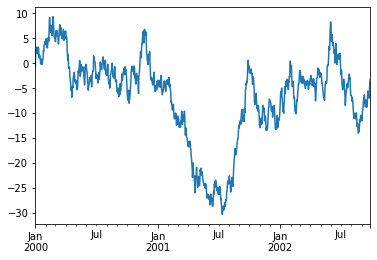

In [98]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

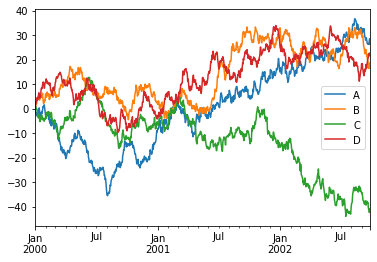

In [99]:
import matplotlib.pyplot as plt

pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
pdf = pdf.cumsum()
plt.figure(); pdf.plot(); plt.legend(loc='best')